In [1]:
from sklearn import model_selection
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns


In [2]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Aviso bebida últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [3]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

In [4]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop(columns=["Alcoolismo e Depressão", "Diagnóstico de depressão", "Diagnóstico de alcoolismo"], axis=1)
Y = df["Alcoolismo e Depressão"]


print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [7]:
test_size = 0.4 # Tamanho do conjunto de teste
seed = 101 # Para que a separação dos dados ocorra sempre a partir da mesma semente (seed), e seja reproduzível em qualquer execução

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = test_size, random_state=seed)

In [8]:
import pandas as pd
import os
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Inicializando o modelo de regressão logística
model = LogisticRegression()

# Treinando o modelo com o conjunto de dados de treinamento
model.fit(X_train, Y_train)

# Realizando previsões com o conjunto de dados de teste
Y_pred = model.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Exibindo os resultados
print('Acurácia do modelo:', accuracy)
print('Matriz de confusão:\n', conf_matrix)
print('Relatório de classificação:\n', class_report)


Acurácia do modelo: 0.9674922600619195
Matriz de confusão:
 [[296  20]
 [  1 329]]
Relatório de classificação:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97       316
         1.0       0.94      1.00      0.97       330

    accuracy                           0.97       646
   macro avg       0.97      0.97      0.97       646
weighted avg       0.97      0.97      0.97       646



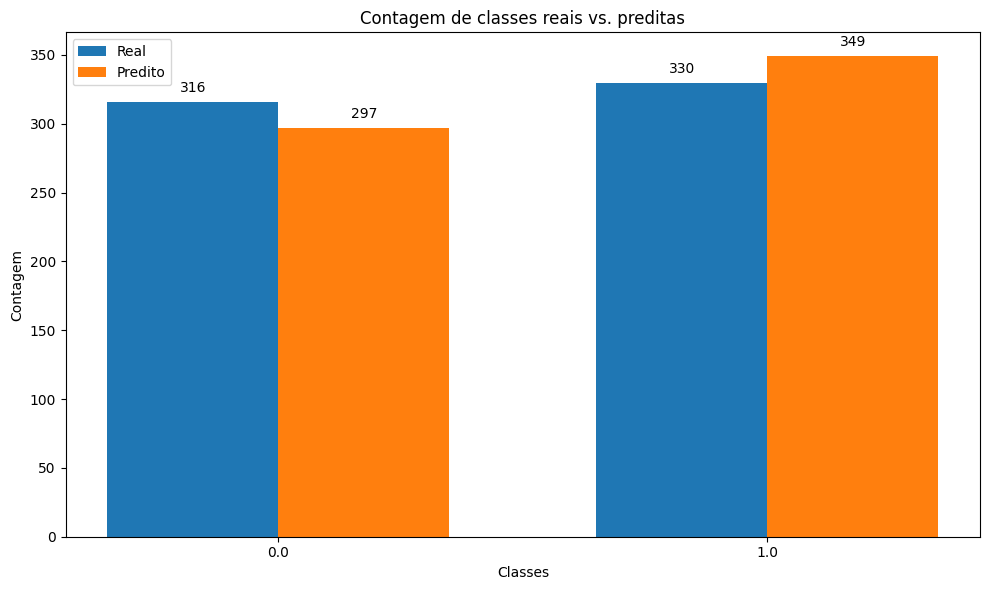

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponha que Y_test são os valores reais e Y_pred são os valores previstos
true_counts = pd.Series(Y_test).value_counts()
pred_counts = pd.Series(Y_pred).value_counts()

# Aqui adicionamos a função que vai adicionar os rótulos
def add_value_labels(ax, spacing=5):
    """Adiciona rótulos com o valor da barra em um gráfico de barras."""
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Número de pontos entre a barra e o rótulo. Altere para mais espaço.
        space = spacing
        va = 'bottom'

        # Se o valor da barra for negativo: Coloque o rótulo abaixo da barra
        if y_value < 0:
            space *= -1
            va = 'top'

        # Use o valor da barra como rótulo e formato
        label = "{:.0f}".format(y_value)

        # Crie o rótulo
        ax.annotate(
            label,                      # Use `label` como rótulo
            (x_value, y_value),         # Posicione o rótulo no final da barra
            xytext=(0, space),          # Desloque o rótulo acima da barra
            textcoords="offset points", # Interprete `xytext` como deslocamento em pontos
            ha='center',                # Alinhe o rótulo horizontalmente no centro
            va=va)                      # Alinhe o rótulo verticalmente na parte inferior

# Criação do gráfico com a função modificada
fig, ax = plt.subplots(figsize=(10,6))

# Índices para o posicionamento das barras
index = sorted(set(true_counts.index).union(pred_counts.index))
bar_width = 0.35

# Barras para os valores reais
real_bars = ax.bar(index, true_counts.reindex(index, fill_value=0), bar_width, label='Real')

# Barras para os valores preditos, deslocados
pred_bars = ax.bar([i + bar_width for i in index], pred_counts.reindex(index, fill_value=0), bar_width, label='Predito')

# Chamando a função para adicionar rótulos ao gráfico
add_value_labels(ax)

# Configuração do gráfico
ax.set_xlabel('Classes')
ax.set_ylabel('Contagem')
ax.set_title('Contagem de classes reais vs. preditas')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(index)
ax.legend()

# Exibição do gráfico
plt.tight_layout()  # Ajusta automaticamente os parâmetros do subplot para dar espaço ao rótulo
plt.show()
